In [12]:
#패션 mnist 다운로드
#데이터 정규화
#데이터를 훈련 검증 테스트로 나눔
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, val_scaled.shape, test_scaled.shape)

(48000, 28, 28) (12000, 28, 28) (10000, 28, 28)


In [13]:
#모델 생성 함수
def model_fn(a_layers = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layers:
    model.add(a_layers)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [14]:
#모델 생성 및 모델 정보 확인
model = model_fn()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#모델의 훈련방법 정의
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
#모델 훈련 및 history 객체 저장
#history: accuracy와 loss 등의 훈련지표 저장
#verbose: 훈련과정을 디스플레이하는 옵션 0(훈련과정 비활성화), 1(default), 2(진행막대 생략)
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9056 - loss: 0.2702
Epoch 2/5
1500/1500 - 7s - 4ms/step - accuracy: 0.9073 - loss: 0.2655
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9094 - loss: 0.2595
Epoch 4/5
1500/1500 - 11s - 7ms/step - accuracy: 0.9111 - loss: 0.2532
Epoch 5/5
1500/1500 - 14s - 9ms/step - accuracy: 0.9128 - loss: 0.2495


In [19]:
#history는 딕셔너리로 저장
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


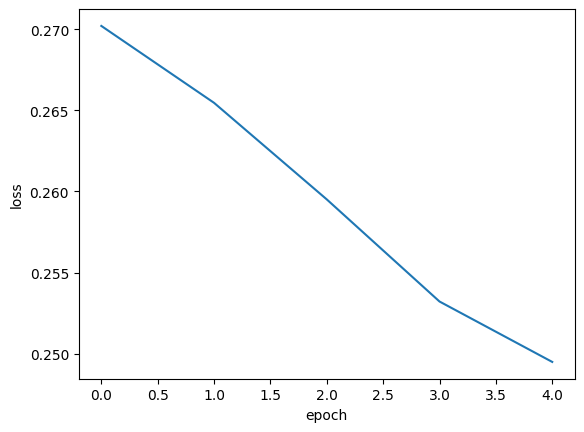

In [20]:
#history에 저장된 훈련디표 loss를 그래프로 표현
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

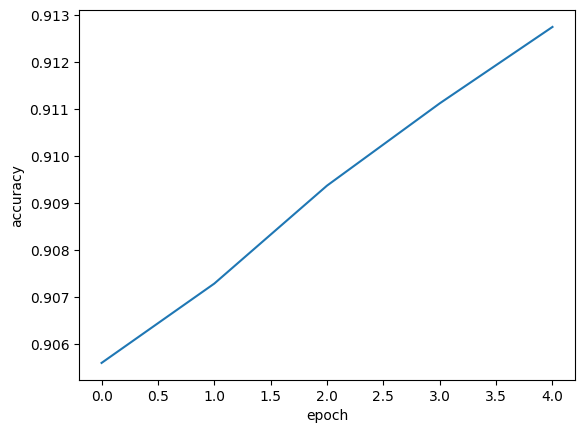

In [21]:
#history에 저장된 훈련지표 accuracy를 그래프로 표현
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


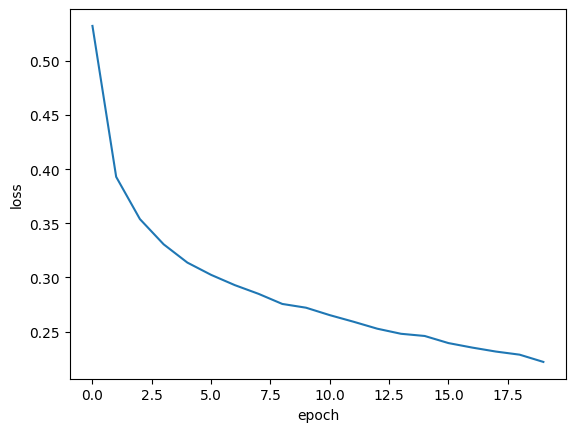

In [22]:
#에포크를 증가시켜 모델 훈련하고 loss 그래프
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [23]:
#최적의 에포크를 결정하려면 훈련데이터와 검증데이터의 loss를 모두 고려해야 함
#fit 메소드에 검증데이터를 함께 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
#history에 저장된 훈련지표를 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


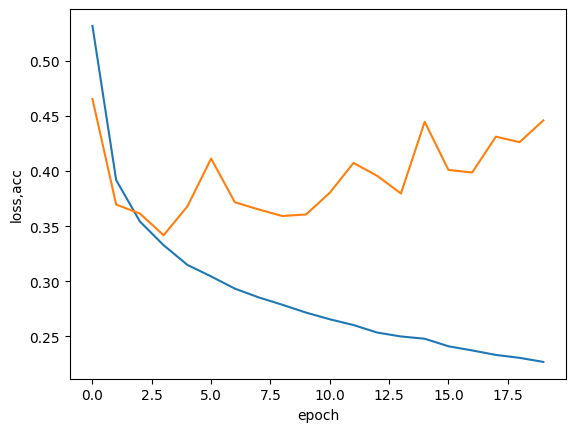

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss,acc')
plt.show()

In [27]:
#옵티마이저: 적응적 학습률을 사용하기 위해 adam으로 지정
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

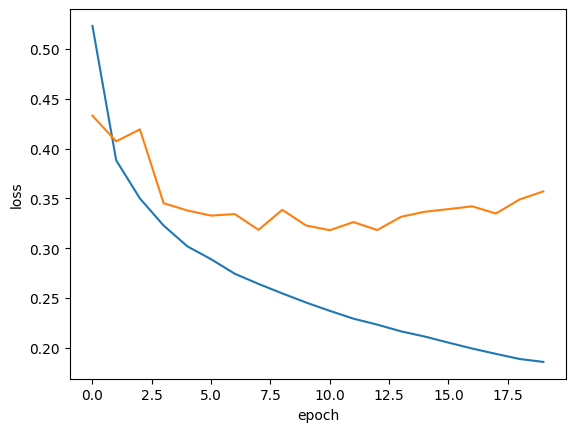

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7359 - loss: 0.7700 - val_accuracy: 0.8413 - val_loss: 0.4407
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8389 - loss: 0.4513 - val_accuracy: 0.8464 - val_loss: 0.4117
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8517 - loss: 0.4099 - val_accuracy: 0.8662 - val_loss: 0.3621
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8618 - loss: 0.3832 - val_accuracy: 0.8712 - val_loss: 0.3522
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8670 - loss: 0.3641 - val_accuracy: 0.8730 - val_loss: 0.3444
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8694 - loss: 0.3528 - val_accuracy: 0.8758 - val_loss: 0.3385
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8733 - loss: 0.3390 - val_accuracy: 0.8763 - val_loss: 0.3360
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8740 - loss: 0.3377 - 

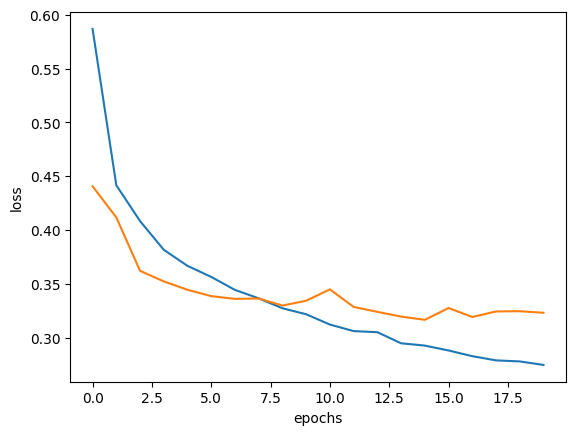

In [29]:
#드롭아웃: 일부 뉴런을 랜덤하게 오프시켜서 과대적합을 줄이고자 하는 방법
#30%를 드롭아웃하는 모델 생성
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [31]:
#모델의 웨이트와 구조 및 파라미터 저장
model.save('my_model.keras') #모델의 구조 및 파라미터 저장, 모델 저장 포맷은 .keras로 변경
model.save_weights('my_model.weights.h5') #웨이트 저장 포맷은 .weigths.h5로 변경
!ls -aal *.*

-rw-r--r-- 1 root root 979407 Dec  8 05:58 my_model.keras
-rw-r--r-- 1 root root 976600 Dec  8 05:58 my_model.weights.h5


In [32]:
#1. 새 모델을 만들고, 저장한 웨이트를 로드에서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('my_model.weights.h5')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
#검증 데이터에 대한 결과 확인
import numpy as np
print(np.round(model.predict(val_scaled[0:1]),5))
print(np.argmax(model.predict(val_scaled[0:1]), axis=1))
val_labels = np.argmax(model.predict(val_scaled), axis=-1) #axis=-1은 마지막 차원을 지정
print(np.mean(val_labels == val_target))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[8]
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8826666666666667


In [34]:
#2. 저장한 모델 전체를 로드해서 사용
model = keras.models.load_model('my_model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8859 - loss: 0.3186


[0.3230336308479309, 0.8826666474342346]

In [43]:
#콜백 함수
#훈련 과정 중 수행할 작업을 지정하는 기능
#keras.callbacks 패키지 아래 정의된 클래스들
#ModelCheckpoint: 각 에포크마다 모델을 저장, save_best_only=True로 지정하면 가장 최적의 모델을 저장할 수 있음
#fit 함수의 callbacks 매개변수에 ModelCheckpoint 객체 전달
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#best 모델 저장
#checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', monitor='val_loss', save_best_only=True)
#에포크마다 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('{epoch:02d}-{val_loss: .2f}-{val_accuracy: .2f}.keras', monitor='val_loss', save_best_only=True)
#조기종료: early stopping, 과대적합이 되기 전에 종료
#patience: 검증손실이 줄어들지 않더라도 훈련을 진행할 에포크 수
#restore_best_weigths=True: 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
#history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7307 - loss: 0.7790 - val_accuracy: 0.8434 - val_loss: 0.4305
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8392 - loss: 0.4415 - val_accuracy: 0.8583 - val_loss: 0.3876
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8537 - loss: 0.4077 - val_accuracy: 0.8628 - val_loss: 0.3657
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8599 - loss: 0.3827 - val_accuracy: 0.8708 - val_loss: 0.3539
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8649 - loss: 0.3722 - val_accuracy: 0.8693 - val_loss: 0.3542
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8664 - loss: 0.3592 - val_accuracy: 0.8742 - val_loss: 0.3437
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8699 - loss: 0.3494 - val_accuracy: 0.8677 - val_loss: 0.3617
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8778 - loss: 0.3284 - 

In [41]:
print(early_stopping_cb.stopped_epoch)

18


In [42]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8898 - loss: 0.3124


[0.31771120429039, 0.8878333568572998]

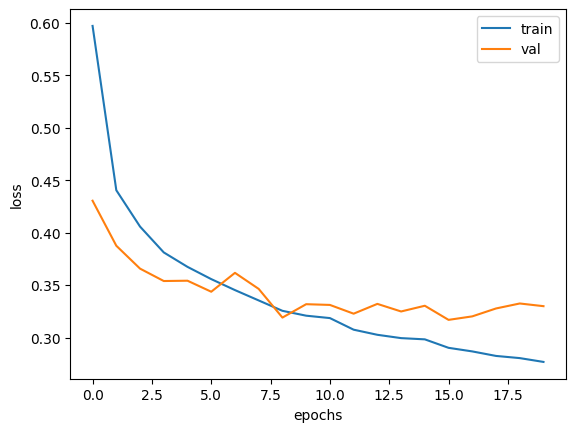

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()